# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Your code here.

# Creatte the dataframe
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

# Check the dataframe
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

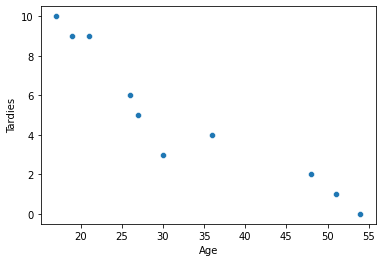

In [10]:
# Your code here.

# Plot a scatter plot
sns.scatterplot(x='Age', y='Tardies', data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

print('''
It seems that the younger students tend to be late for class. In other words, the older the student is, the more punctual
this person is.
''')

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Covariance
'''
The covariance provides the direction of linear relationship between two variables. That means it measures how they vary
together, checking if they are directly or inversly proportional to each other.
'''
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [13]:
# Correlation
'''
Besides checking the direction of the linear relationship, the correlation shows the strength of the relationship between
two variables. It can vary from -1 to +1. The closer the value is to +1 or -1, the stronger the relationship is. If the
value if positive, it means they are directly proportional. Otherwise, they are inversely proportional.
'''
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
# Your response here.
print('''
The covariance is a negative number, meaning that the variables "Age" and "Tardies" are inversely proportional to each
other. In other words, it means that when the value of one of them increases, the value of the other decreases.
The correlation is about -0.939, meaning that their relationship is very strong and they are inversely proportional.
''')

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Regression model
from sklearn.linear_model import LinearRegression

## Instance the model
model = LinearRegression()

## Separate variables
X = student_data[['Age']]
y = student_data['Tardies']

## Perform the regression
model.fit(X, y)

LinearRegression()

In [ ]:
# Your response here.
print('''
The regression used is a simple linear regression, which is a simple model, easy to  understand and it can solve the
problem. Since only two variables are the input of this model, the result is represented by two outcome variables and
putting them together, a function of a single line can be written. One of them is the y-intercept, which is a constant
that represents the where line intercepts the y-axis. The other one is the slope, which is a represents line's slope.
''')

Plot your regression model on your scatter plot.

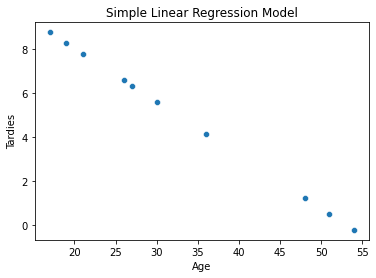

In [21]:
# Your code here.

# Perform the prediction
y_predict = model.predict(X)

# Plot the scatter plot
sns.scatterplot(x=student_data.Age, y=y_predict)

# Label axis y
plt.ylabel('Tardies')

# Add a title
plt.title('Simple Linear Regression Model');

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [25]:
from sklearn.metrics import mean_squared_error

# Outcome variables
y_intercept = model.intercept_
slope = model.coef_

# Root Mean Squared Error
rmse = mean_squared_error(y_true=student_data.Tardies, y_pred=y_predict, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.1540884648655088


In [23]:
# Your response here. 
print(f'''
The function that represents the model is Tardies = {slope}*Age + {y_intercept} and it represents well the dataset, since
the root mean squared error is around {rmse:.2f}, a low value for error. Therefore, the age is indeed a good predictor of
tardiness in this case.
''')


The function that represents the model is Tardies = [-0.24282077]*Age + 12.888803363135771.




## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data

# Import the dataset
vehicles = pd.read_csv('vehicles.csv')

# Check the dataset
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
# Select the desired columns
vehicle_analysis = vehicles.loc[:, ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Check the dataset
vehicle_analysis.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


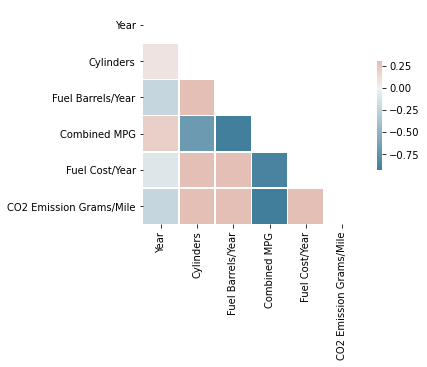

In [31]:
# Correlation
corr = vehicle_analysis.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [4]:
# Your response here. 

print('''
As shown in the heatmap above, the most important variable to determine CO2 emissions is the "Combined MPG", since it is
represented by a darker blue. The one that provides the least information may be the "Cylinders", "Fuel Barries/Year"
and/or "Fuel Cost/Year", because the three have about the same color.
''')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [34]:
from sklearn.preprocessing import StandardScaler

# Separate the variables
X = vehicle_analysis[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicle_analysis['CO2 Emission Grams/Mile']

# Standadize the variables
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# Instance the model
model = LinearRegression()

# Perform the regression
model.fit(X_std, y)

LinearRegression()

In [35]:
# Your response here.
print('''
A linear regression will be used in this dataset. The reasons to use this model is that it is easier than other models and
it can solve the problem. Besides, the input variables will be standarized since all of them are in different scales.
''')


A linear regression will be used in this dataset. The reasons to use this model is that it is easier than other models and
it can solve the problem. Besides, the input variables will be standarized since all of them are in different scales.



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
# Check the dataset
X.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550


In [36]:
# Perform the prediction
y_predict = model.predict(X_std)

# Regression summary
## Y-intercept
y_intercept = model.intercept_
print(f'Y-intercept: {y_intercept}')

## Coefficients
coefs = model.coef_
print(f'Coefficients: {coefs}')

# Root Mean Squared Error
rmse = mean_squared_error(y_true=vehicle_analysis['CO2 Emission Grams/Mile'], y_pred=y_predict, squared=False)
print(f'RMSE: {rmse}')

Y-intercept: 475.3163392572124
Coefficients: [ -3.2334676    3.29775166  85.11361853 -15.54354881  16.3793413 ]
RMSE: 16.465711496024085


In [ ]:
# Your response here. 



## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 